In [1]:
! tar -xzf "Data/matrix.mtx.gz" -C data

tar: Error opening archive: Failed to open 'Data/matrix.mtx.gz'


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\88695\AppData\Local\Programs\Python\Python3

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


In [4]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [5]:
adata2 = sc.read_10x_mtx(
    '../Data/05 - MEN108.2/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-aAxis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - MEN108.2-matrix.h5ad


In [6]:
adata3 = sc.read_10x_mtx(
    '../Data/05 - MEN09/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-aAxis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - MEN09-matrix.h5ad


In [7]:
adata4 = sc.read_10x_mtx(
    '../Data/05 - MEN09_Tumor/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-aAxis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - MEN09_Tumor-matrix.h5ad


In [8]:
adata5 = sc.read_10x_mtx(
    '../Data/05 - Men104.1/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - Men104.1-matrix.h5ad


In [9]:
adata6 = sc.read_10x_mtx(
    '../Data/05 - MEN104.2/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-aAxis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - MEN104.2-matrix.h5ad


In [10]:
adata7 = sc.read_10x_mtx(
    '../Data/05 - MEN108.1/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-aAxis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - MEN108.1-matrix.h5ad


In [11]:
adata = sc.concat([adata2, adata3, adata4, adata5, adata6, adata7], join= 'outer')

In [12]:
adata.var['gene_ids'] = list(adata2.var['gene_ids'])

In [13]:
all_genes = list(adata.var['gene_ids'].values)  
'XCL2' in all_genes 

True

In [14]:
chemokine_list = ['CCL2', 'CCL3', 'CCL4', 'CCL20', 'CCL26', 'CCL28', 'CXCL1', 'CXCL2', 'CXCL3', 
                  'CXCL6', 'CXCL8', 'CXCL10', 'CXCL14', 'CCL26']

In [15]:
adata.to_df()[chemokine_list]

,CCL2,CCL3,CCL4,CCL20,CCL26,CCL28,CXCL1,CXCL2,CXCL3,CXCL6,CXCL8,CXCL10,CXCL14,CCL26
MEN108.2_AAACCTGAGCCCTAAT-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
MEN108.2_AAACCTGCACCACGTG-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
MEN108.2_AAACCTGCAGCGAACA-1,0.0,0.0,0.0,0.0,4.004185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.004185
MEN108.2_AAACCTGGTTGTGGAG-1,0.0,0.0,0.0,0.0,4.646407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.646407
MEN108.2_AAACCTGTCCCTTGTG-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEN108.1_TTCTCCTGTATATGGA-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
MEN108.1_TTCTTAGTCGGCCGAT-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
MEN108.1_TTGACTTTCGGCTACG-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
MEN108.1_TTGGCAAGTATTAGCC-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [16]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [17]:
# Test sample names
adata

AnnData object with n_obs × n_vars = 21807 × 16088
    var: 'gene_ids'

In [18]:
adata.var

,gene_ids
LINC00115,LINC00115
SAMD11,SAMD11
NOC2L,NOC2L
KLHL17,KLHL17
HES4,HES4
...,...
AL139351.3,AL139351.3
GNAZ,GNAZ
SHISAL1,SHISAL1
LINC00685,LINC00685


normalizing counts per cell
    finished (0:00:00)


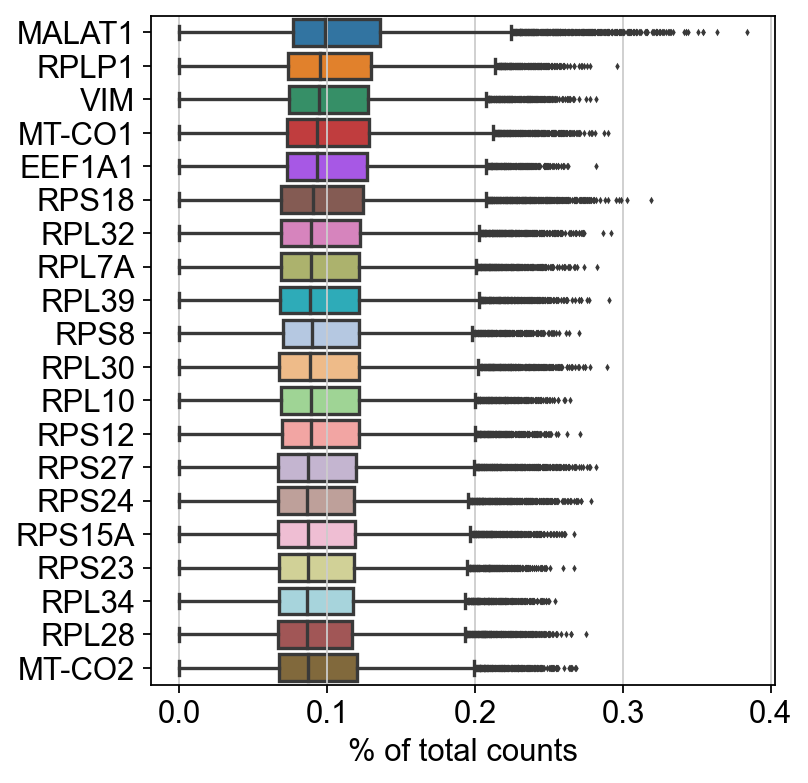

In [19]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [20]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1413 genes that are detected in less than 3 cells


In [21]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


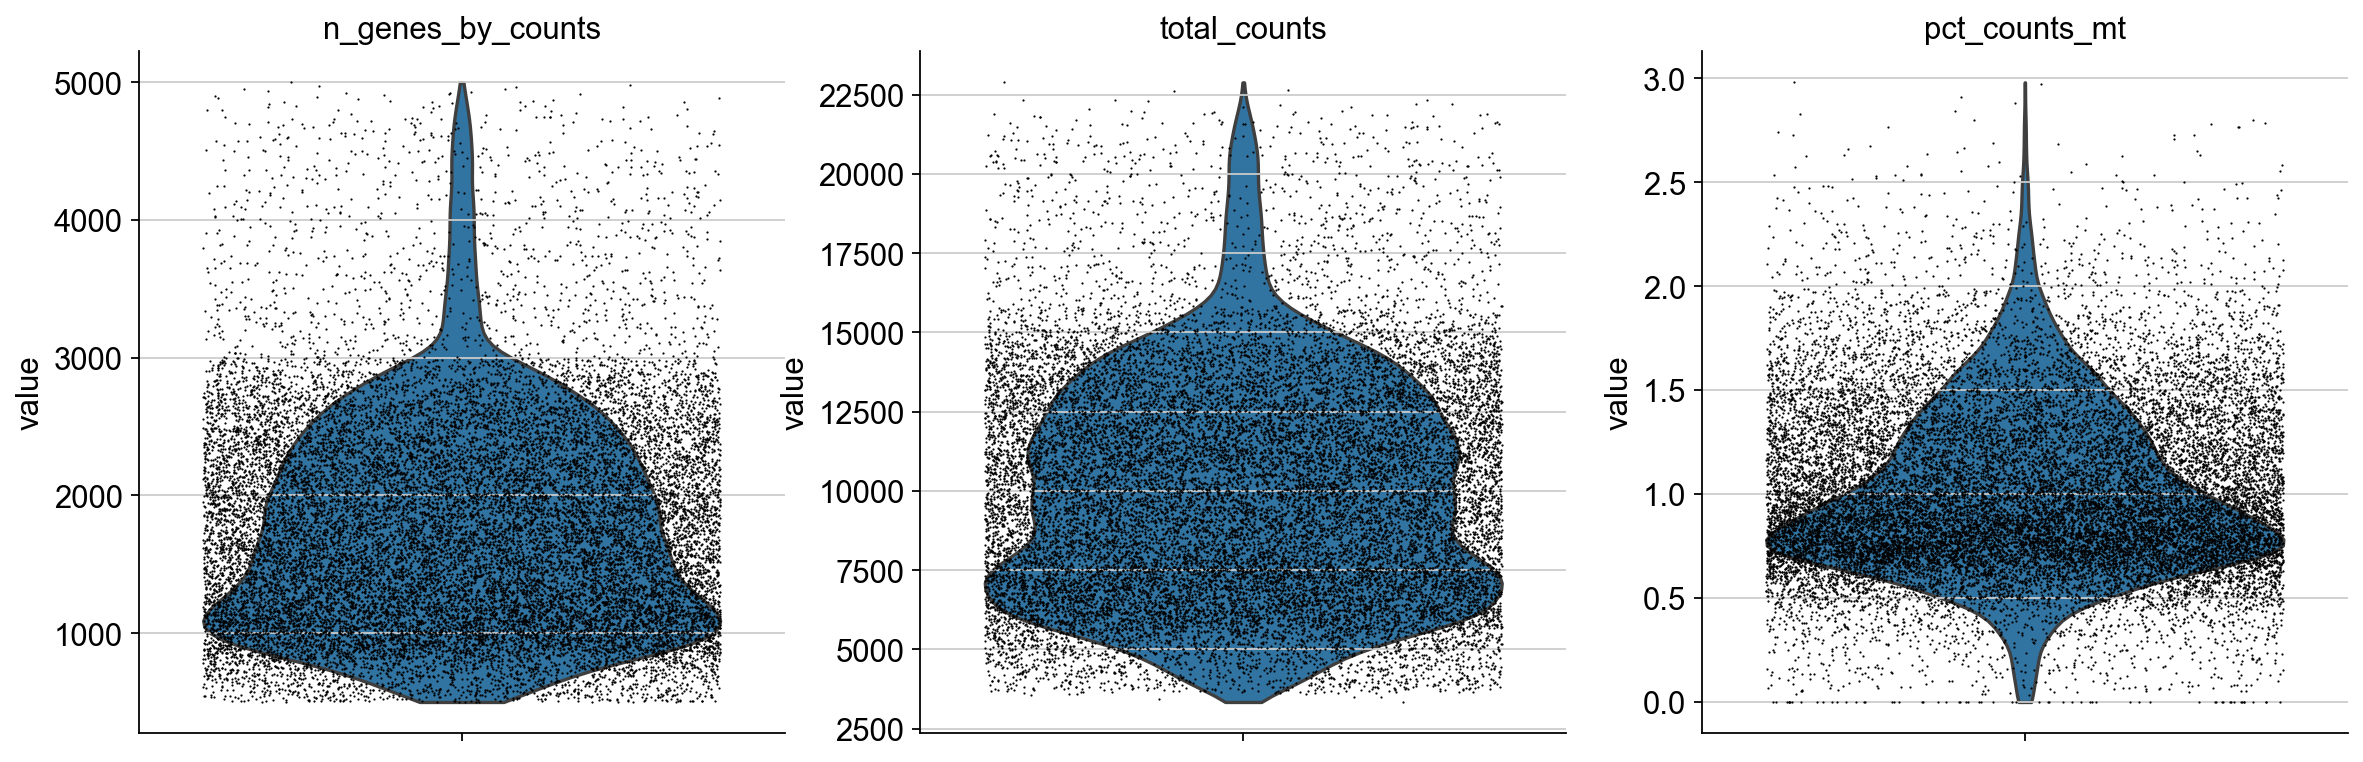

In [22]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

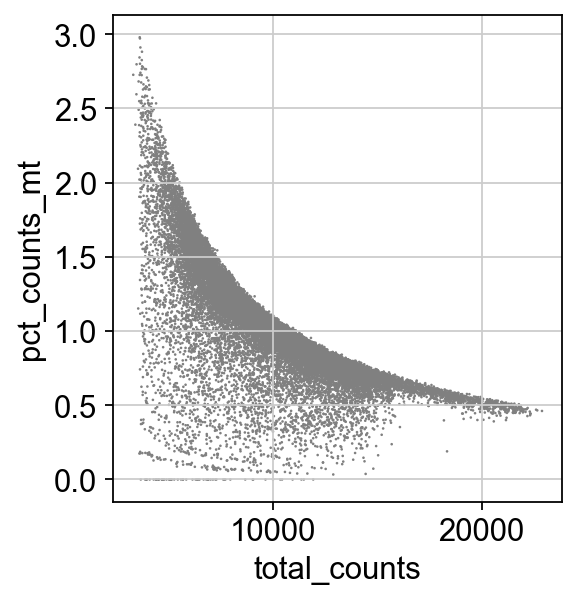

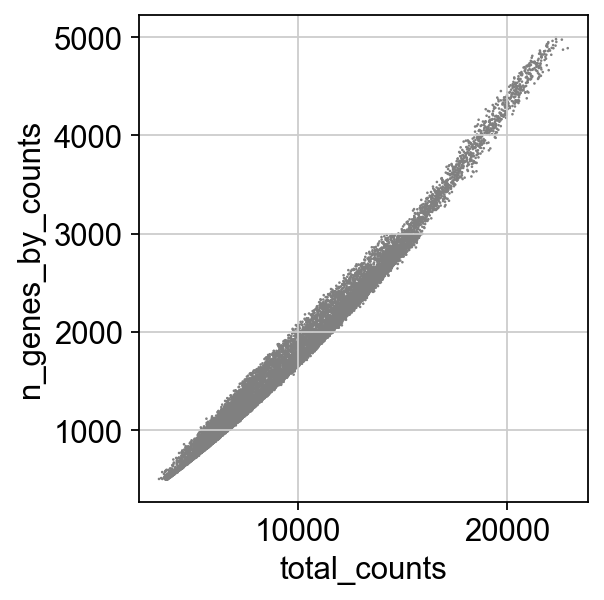

In [23]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt') # quality control 
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [24]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [25]:
sc.pp.normalize_total(adata, target_sum=1e4) 

C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [26]:
sc.pp.log1p(adata) # log make numbers readible

In [27]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


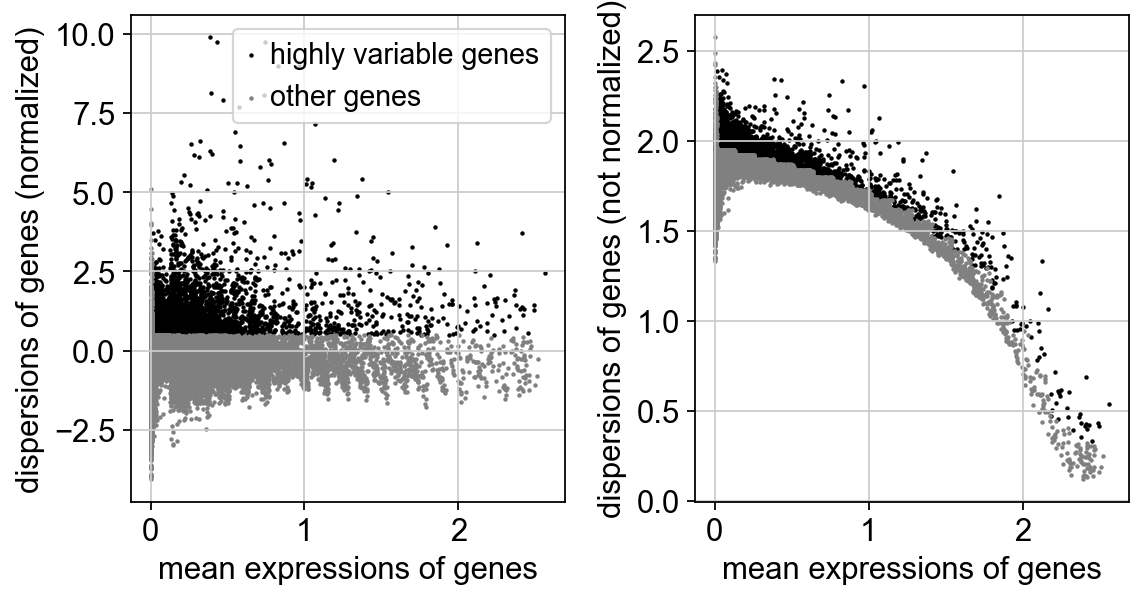

In [28]:
sc.pl.highly_variable_genes(adata)

In [29]:
adata.raw = adata

In [30]:
adata = adata[:, adata.var.highly_variable] # : all rows

In [31]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:02:31)


In [32]:
sc.pp.scale(adata, max_value=10)

In [33]:
sc.tl.pca(adata, svd_solver='arpack') # pca dimension reduction

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:11)


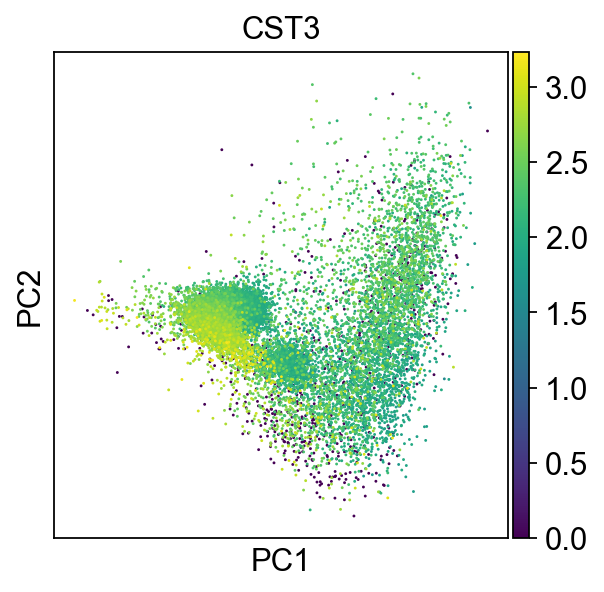

In [34]:
sc.pl.pca(adata, color='CST3')

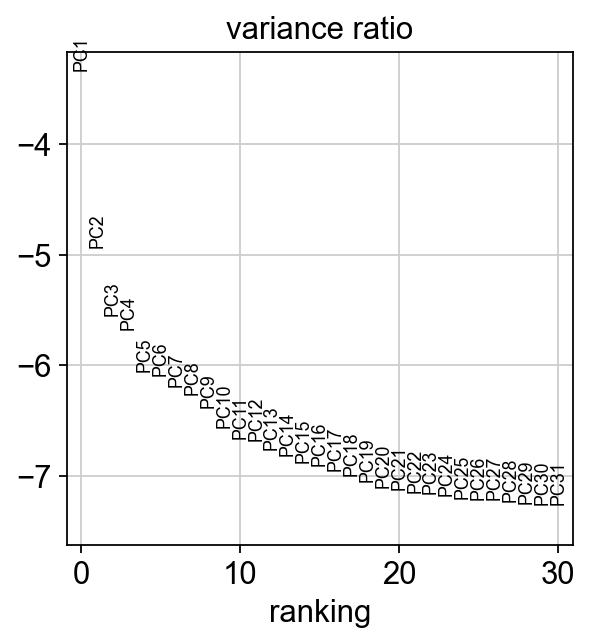

In [35]:
sc.pl.pca_variance_ratio(adata, log=True)

In [36]:
adata.write(results_file)

FileNotFoundError: [Errno 2] Unable to create file (unable to open file: name = 'write\pbmc3k.h5ad', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [ ]:
adata

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [ ]:
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color=['EGFR', 'CCL26', 'IL6', 'S100B', 'MCM2', 'CCL5'] )

In [ ]:
sc.pl.umap(adata, color=['CCL26', 'PAX6'])

In [ ]:
sc.tl.leiden(adata, resolution = 0.2)

In [ ]:
sc.pl.umap(adata, color=['leiden', 'CCL2', 'CXCR4', 'EGFR', 'CCL3', 'CCL4', 'CCL5', 'CCL14', 'CCL20', 'CCL26', 'CXCL2',
    'CXCL3', 'CXCL5',  'CXCL8',  'CXCL12'])

In [ ]:
adata.write(results_file)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
adata.write(results_file)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [ ]:
adata = sc.read(results_file)

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

In [ ]:
adata = sc.read(results_file)

In [ ]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

In [ ]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)

In [ ]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [ ]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

In [ ]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

In [ ]:
adata

In [ ]:
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading

In [ ]:
adata.raw.to_adata().write('./write/pbmc3k_withoutX.h5ad')

In [ ]:
# Export single fields of the annotation of observations
# adata.obs[['n_counts', 'louvain_groups']].to_csv(
#     './write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
# adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv(
#     './write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
# adata.write_csvs(results_file[:-5], )